In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Linear regression

In [57]:
train_data = pd.read_csv('../data/train_final2.csv')
train_data = train_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview', 'top_actors'])
X_train = train_data.drop(columns=['IMDB Score'])
print(np.cov(train_data['IMDB Score']))

1.0770839381855313


In [39]:
test_data = pd.read_csv('../data/test_final2.csv')
test_data = test_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview', 'top_actors'])
X_test = test_data.drop(columns=['IMDB Score'])
print(np.cov(test_data['IMDB Score']))

1.0869889853982997


In [40]:
X_train.head()

,runtime,budget,animation,adventure,comedy,family,crime,drama,thriller,romance,...,runs,stop,alien,missing,thief,scientist,sent,baby,partner,kill
0,117.0,120000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,104.0,9500000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,99.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,144.0,70000000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
linearRegression = LinearRegression().fit(X_train, train_data['IMDB Score'])

In [42]:
print('train R^2: ', linearRegression.score(X_train, train_data['IMDB Score']))
print('test R^2: ', linearRegression.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(linearRegression.predict(X_train), train_data['IMDB Score']))
print('train MAE: ', mean_absolute_error(linearRegression.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(linearRegression.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(linearRegression.predict(X_test), test_data['IMDB Score']))

train R^2:  0.6208261792776355
test R^2:  0.1300819937951585
train MAE:  0.47212937806453487
train MAE:  0.7639662047495716
train MSE:  0.36856706094261105
test MSE:  0.9449870792568071


In [43]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
linearModel = GridSearchCV(estimator=LinearRegression(), param_grid=parameters, scoring='r2', cv=5).fit(X_train, train_data['IMDB Score'])

In [44]:
print("best estimator: ", linearModel.best_estimator_)
print("best params: ", linearModel.best_params_)
print("best score: ", linearModel.best_score_)

best estimator:  LinearRegression()
best params:  {'fit_intercept': True, 'normalize': False}
best score:  -0.30023946724131534


In [45]:
linearRegressionGrid = LinearRegression(fit_intercept= True, normalize=False).fit(X_train, train_data['IMDB Score'])
print('train R^2: ', linearRegressionGrid.score(X_train, train_data['IMDB Score']))
print('test R^2: ', linearRegressionGrid.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(linearRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(linearRegressionGrid.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(linearRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(linearRegressionGrid.predict(X_test), test_data['IMDB Score']))

train R^2:  0.6208261792776355
test R^2:  0.1300819937951585
train MAE:  0.47212937806453487
test MAE:  0.7639662047495716
train MSE:  0.36856706094261105
test MSE:  0.9449870792568071


# Ridge regression

In [46]:
ridgeRegression = Ridge(alpha=10, normalize=True, random_state=0).fit(X_train, train_data['IMDB Score'])

print('Train R^2: ', ridgeRegression.score(X_train, train_data['IMDB Score']))
print('Test R^2: ', ridgeRegression.score(X_test, test_data['IMDB Score']))

print('Train MAE: ', mean_absolute_error(ridgeRegression.predict(X_train), train_data['IMDB Score']))
print('Test MAE: ', mean_absolute_error(ridgeRegression.predict(X_test), test_data['IMDB Score']))

print('Train MSE: ', mean_squared_error(ridgeRegression.predict(X_train), train_data['IMDB Score']))
print('Test MSE: ', mean_squared_error(ridgeRegression.predict(X_test), test_data['IMDB Score']))

Train R^2:  0.1647496586788495
Test R^2:  0.11339953697547978
Train MAE:  0.6984401029408435
Test MAE:  0.7559315292037981
Train MSE:  0.8118855960719329
Test MSE:  0.9631091390744124


In [ ]:
parameters = {'alpha':[1,5,10,30], 'fit_intercept':[True,False], 'normalize':[True]}
ridgeModel = GridSearchCV(estimator=Ridge(), param_grid=parameters, scoring='r2', cv=5, error_score='raise').fit(X_train, train_data['IMDB Score'])

In [12]:
print(ridgeModel.best_estimator_)
print(ridgeModel.best_params_)
print(ridgeModel.best_score_)

Ridge(alpha=1, normalize=True)
{'alpha': 1, 'fit_intercept': True, 'normalize': True}
0.2984863606455602


In [26]:
ridgeRegressionGrid = Ridge(alpha=1, fit_intercept=True, normalize=True, random_state=0).fit(X_train, train_data['IMDB Score'])

print('Train R^2: ', ridgeRegressionGrid.score(X_train, train_data['IMDB Score']))
print('Test R^2: ', ridgeRegressionGrid.score(X_test, test_data['IMDB Score']))

print('Train MAE: ', mean_absolute_error(ridgeRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('Test MAE: ', mean_absolute_error(ridgeRegressionGrid.predict(X_test), test_data['IMDB Score']))

print('Train MSE: ', mean_squared_error(ridgeRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('Test MSE: ', mean_squared_error(ridgeRegressionGrid.predict(X_test), test_data['IMDB Score']))

Train R^2:  0.4135045851793163
Test R^2:  0.2838716548308241
Train MAE:  0.6033951021942335
Test MAE:  0.6898151137303044
Train MSE:  0.6211593156006241
Test MSE:  0.7765923793421503


# Lasso (Least Absolute Shrinkage and Selection Operator)

In [47]:
lassoRegression = Lasso(alpha=0.01, random_state=0).fit(X_train, train_data['IMDB Score'])

In [48]:
print('train R^2: ', lassoRegression.score(X_train, train_data['IMDB Score']))
print('test R^2: ', lassoRegression.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(lassoRegression.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(lassoRegression.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(lassoRegression.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(lassoRegression.predict(X_test), test_data['IMDB Score']))

train R^2:  0.21046972984265722
test R^2:  0.23584019357436325
train MAE:  0.6772707778585297
test MAE:  0.7006286387381324
train MSE:  0.7674444681933548
test MSE:  0.8301025365712112


In [16]:
parameters = {'alpha':[0.1, 0.01, 0.5], 'fit_intercept':[True,False], 'normalize':[True,False], 'selection':['cyclic', 'random']}
lassoModel = GridSearchCV(estimator=Lasso(), param_grid=parameters, scoring='r2', cv=5, error_score="raise").fit(X_train, train_data['IMDB Score'])

In [17]:
print(lassoModel.best_estimator_)
print(lassoModel.best_params_)
print(lassoModel.best_score_)

Lasso(alpha=0.01, selection='random')
{'alpha': 0.01, 'fit_intercept': True, 'normalize': False, 'selection': 'random'}
0.22305677917188368


In [30]:
lassoRegressionGrid = Lasso(alpha=0.01, normalize=False, selection='random', fit_intercept=True).fit(X_train, train_data['IMDB Score'])

print('train R^2: ', lassoRegressionGrid.score(X_train, train_data['IMDB Score']))
print('test R^2: ', lassoRegressionGrid.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(lassoRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(lassoRegressionGrid.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(lassoRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(lassoRegressionGrid.predict(X_test), test_data['IMDB Score']))

train R^2:  0.3067452704795627
test R^2:  0.304028552361731
train MAE:  0.7552564534961796
test MAE:  0.752210485497123
train MSE:  0.9530734639152751
test MSE:  0.953172175144332


# Random Forest

In [49]:
RandomForestReg = RandomForestRegressor(n_estimators=100, max_depth=32).fit(X_train, train_data['IMDB Score'])

In [50]:
print('train R^2: ', RandomForestReg.score(X_train, train_data['IMDB Score']))
print('test R^2: ', RandomForestReg.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(RandomForestReg.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(RandomForestReg.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(RandomForestReg.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(RandomForestReg.predict(X_test), test_data['IMDB Score']))

train R^2:  0.8396166117233068
test R^2:  0.37301219322213874
train MAE:  0.31904314766023417
test MAE:  0.6288822031602377
train MSE:  0.15589692856047918
test MSE:  0.6810933582597051


In [36]:
parameters = {'n_estimators':[100, 200], 'max_depth':[16, 32], 'min_samples_leaf': [2, 3]}
randomForestModel = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, scoring='neg_mean_squared_error', cv=5, error_score="raise").fit(X_train, train_data['IMDB Score'])

In [ ]:
randomForestGrid = RandomForestRegressor(n_estimators=100, max_depth=32, min_samples_leaf=2).fit(X_train, train_data['IMDB Score'])

print('train R^2: ', randomForestGrid.score(X_train, train_data['IMDB Score']))
print('test R^2: ', randomForestGrid.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(randomForestGrid.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(randomForestGrid.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(randomForestGrid.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(randomForestGrid.predict(X_test), test_data['IMDB Score']))

Index(['runtime', 'budget', 'drama', 'action', 'documentary', 'animation',
       'horror', 'woody allen', 'thriller', 'biography', 'comedy',
       'danny trejo', 'crime', 'fantasy', 'sci-fi', 'evil', 'A',
       'pixar animation studios', 'mystery', ''s'],
      dtype='object')


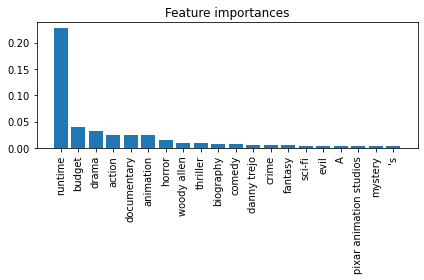

In [51]:
featureImportances = np.argsort(RandomForestReg.feature_importances_)[::-1]
print(X_train.columns[featureImportances[:20]])
plt.figure()
plt.title("Feature importances")
plt.bar(range(20),RandomForestReg.feature_importances_[featureImportances[:20]])
plt.xticks(range(20), X_train.columns[featureImportances[:20]], rotation='vertical')
plt.tight_layout()
plt.savefig('../data/randomforest.png')
plt.show()

# XGBoost (eXtreme Gradient Boosting)

In [52]:
xgbRegression = xgb.XGBRegressor(objective='reg:squarederror').fit(X_train, train_data['IMDB Score'])

In [53]:
print('train R^2: ', xgbRegression.score(X_train, train_data['IMDB Score']))
print('test R^2: ', xgbRegression.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(xgbRegression.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(xgbRegression.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(xgbRegression.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(xgbRegression.predict(X_test), test_data['IMDB Score']))

train R^2:  0.7379314458754471
test R^2:  0.3898023988060608
train MAE:  0.38914576200107315
test MAE:  0.6223922787687649
train MSE:  0.2547376202691225
test MSE:  0.6628542515603367


# Plotting errors for different models

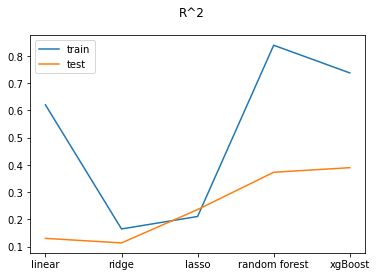

In [54]:
r2_train_errors = [linearRegression.score(X_train, train_data['IMDB Score']), ridgeRegression.score(X_train, train_data['IMDB Score']), lassoRegression.score(X_train, train_data['IMDB Score']), RandomForestReg.score(X_train, train_data['IMDB Score']), xgbRegression.score(X_train, train_data['IMDB Score'])]
r2_test_errors = [linearRegression.score(X_test, test_data['IMDB Score']), ridgeRegression.score(X_test, test_data['IMDB Score']), lassoRegression.score(X_test, test_data['IMDB Score']), RandomForestReg.score(X_test, test_data['IMDB Score']), xgbRegression.score(X_test, test_data['IMDB Score'])]
models = ['linear','ridge', 'lasso', 'random forest', 'xgBoost']

plt.suptitle('R^2')
plt.plot(models, r2_train_errors)
plt.plot(models, r2_test_errors)
plt.legend(labels=['train', 'test'])
plt.show()

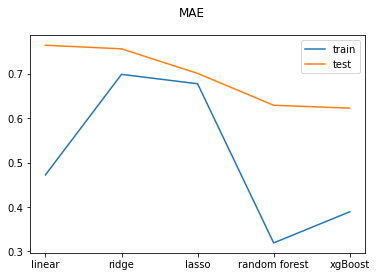

In [55]:
mae_train_errors = [mean_absolute_error(linearRegression.predict(X_train), train_data['IMDB Score']), mean_absolute_error(ridgeRegression.predict(X_train), train_data['IMDB Score']), mean_absolute_error(lassoRegression.predict(X_train), train_data['IMDB Score']), mean_absolute_error(RandomForestReg.predict(X_train), train_data['IMDB Score']), mean_absolute_error(xgbRegression.predict(X_train), train_data['IMDB Score'])]
mae_test_errors = [mean_absolute_error(linearRegression.predict(X_test), test_data['IMDB Score']), mean_absolute_error(ridgeRegression.predict(X_test), test_data['IMDB Score']), mean_absolute_error(lassoRegression.predict(X_test), test_data['IMDB Score']), mean_absolute_error(RandomForestReg.predict(X_test), test_data['IMDB Score']), mean_absolute_error(xgbRegression.predict(X_test), test_data['IMDB Score'])]
models = ['linear','ridge', 'lasso', 'random forest', 'xgBoost']

plt.suptitle('MAE')
plt.plot(models, mae_train_errors)
plt.plot(models, mae_test_errors)
plt.legend(labels=['train', 'test'])
plt.show()

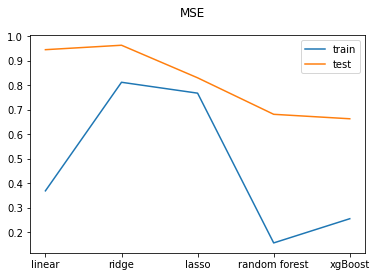

In [56]:
mse_train_errors = [mean_squared_error(linearRegression.predict(X_train), train_data['IMDB Score']), mean_squared_error(ridgeRegression.predict(X_train), train_data['IMDB Score']), mean_squared_error(lassoRegression.predict(X_train), train_data['IMDB Score']), mean_squared_error(RandomForestReg.predict(X_train), train_data['IMDB Score']), mean_squared_error(xgbRegression.predict(X_train), train_data['IMDB Score'])]
mse_test_errors = [mean_squared_error(linearRegression.predict(X_test), test_data['IMDB Score']), mean_squared_error(ridgeRegression.predict(X_test), test_data['IMDB Score']), mean_squared_error(lassoRegression.predict(X_test), test_data['IMDB Score']), mean_squared_error(RandomForestReg.predict(X_test), test_data['IMDB Score']), mean_squared_error(xgbRegression.predict(X_test), test_data['IMDB Score'])]
models = ['linear','ridge', 'lasso', 'random forest', 'xgBoost']

plt.suptitle('MSE')
plt.plot(models, mse_train_errors)
plt.plot(models, mse_test_errors)
plt.legend(labels=['train', 'test'])
plt.show()